### Import libs

In [164]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle

### Plot road

In [165]:
def plot_graph(G, title, coords=True):
    '''Plot the graph'''
    plt.figure(figsize=(5,5))
    pos = dict((n, n) for n in G.nodes())
    nx.draw_networkx(G, pos=pos, with_labels=coords, node_size=30)
    plt.title(title)
    plt.axis('off')
    plt.show()

### Load road

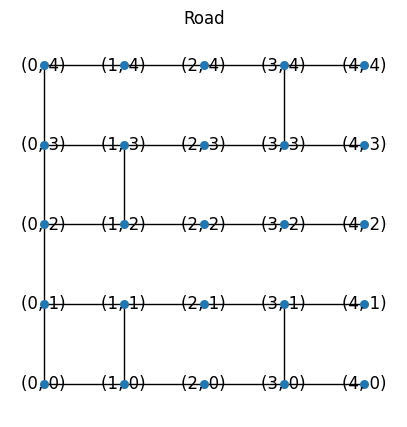

In [166]:
road = pickle.load(open('data/road.pickle', 'rb'))
plot_graph(road, 'Road')

### Agent

In [167]:
from typing import Tuple, List

class Agent:
    def __init__(self, graph, start: Tuple[int, int], end: Tuple[int, int]):
        self.graph = graph
        self.start = start
        self.end = end
        self.current = start
        self.visited = (start,)
        self.path = [start]
        self.knowledge = {}
        
    def get_next(self, node: Tuple[int, int]) -> List[Tuple[int, int]]:
        return tuple(self.graph[node])
    
    def heuristic(self, node1: Tuple[int, int], node2: Tuple[int, int]) -> int:
        return abs(node1[0] - node2[0]) + abs(node1[1] - node2[1])
    
    def is_locked(self, node: Tuple[int, int]) -> bool:
        return len(self.get_next(node)) == 1 and node != self.end
    
    def move(self, new: Tuple[int, int]):
        self.current = new
        self.path.append(new)
        self.visited += (new,)  
        print(*self.path, sep=' -> ')     
    
    def get_best_near(self, best: Tuple[int, int]) -> Tuple[int, int]:
        possible_moves = self.get_possible_moves(self.get_next(self.current))
        
        while len(possible_moves) == 0:
            self.path.pop()
            self.current = self.path[-1]
            possible_moves = self.get_possible_moves(self.get_next(self.current))         
        
        best_near = min(possible_moves, key=lambda node: self.heuristic(node, best))
        return best_near

    def search(self):
        while self.current != self.end:
            self.tell()
            best = self.ask() 
            
            if best not in self.get_next(self.current):
                best = self.get_best_near(best)

            self.move(best)
                    
    def tell(self) -> None:
        for near_node in self.get_next(self.current):
            if self.is_locked(near_node):
                continue
            
            if near_node not in self.knowledge:
                self.knowledge[near_node] = self.heuristic(near_node, self.end)
                
            for far_node in self.get_next(near_node):        
                if far_node not in self.knowledge:
                    self.knowledge[far_node] = self.heuristic(far_node, self.end)
                 
    def ask(self) -> Tuple[int, int]:
        possible_moves = self.get_possible_moves(self.knowledge)
        return min(possible_moves, key=lambda node: self.knowledge[node])
    
    def get_possible_moves(self, node_list: List[Tuple[int, int]]):
        possible_moves = filter(lambda node: node not in self.visited, node_list)
        possible_moves = filter(lambda node: not self.is_locked(node), possible_moves)
        return list(possible_moves)

### Plot path

In [168]:
def plot_path(G, agent, title, coords=True):
    '''Plot the graph with path'''
    plt.figure(figsize=(5,5))
    pos = dict((n, n) for n in G.nodes())
    nx.draw_networkx(G, pos=pos, with_labels=coords, node_size=30)
    nx.draw_networkx_nodes(G, pos=pos, 
                           nodelist=agent.visited, 
                           node_color='r', 
                           node_size=30)
    
    nx.draw_networkx_nodes(G, pos=pos, 
                           nodelist=agent.path, 
                           node_color='g', 
                           node_size=30)
    
    nx.draw_networkx_edges(G, pos=pos, 
                           edgelist=[(agent.path[i], agent.path[i+1]) for i in range(len(agent.path)-1)], 
                           edge_color='g', width=2)
    plt.title(title)
    plt.axis('off')
    plt.show()

(0, 0) -> (1, 0)
(0, 0) -> (1, 0) -> (2, 0)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1) -> (1, 1)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1) -> (1, 1) -> (0, 1)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1) -> (1, 1) -> (0, 1) -> (0, 2)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1) -> (1, 1) -> (0, 1) -> (0, 2) -> (1, 2)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1) -> (1, 1) -> (0, 1) -> (0, 2) -> (1, 2) -> (2, 2)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1) -> (1, 1) -> (0, 1) -> (0, 2) -> (1, 2) -> (2, 2) -> (3, 2)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1) -> (1, 1) -> (0, 1) -> (0, 2) -> (1, 2) -> (1, 3)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1) -> (1, 1) -> (0, 1) -> (0, 2) -> (1, 2) -> (1, 3) -> (2, 3)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) ->

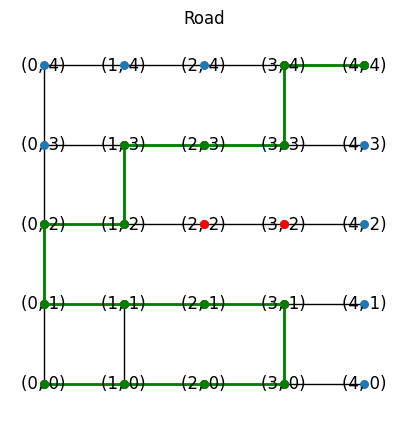

In [169]:
car = Agent(road, (0, 0), (4, 4))
car.search()

plot_path(road, car, 'Road')

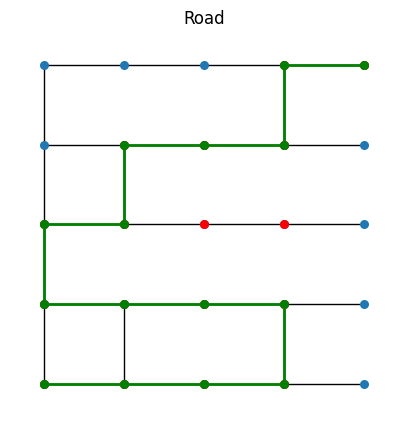

In [170]:
plot_path(road, car, 'Road', coords=False)